In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

In [2]:
stock1_ticker = 'IDBI.NS'
stock2_ticker = 'AXISBANK.NS'

In [3]:
stock1_data = yf.download(stock1_ticker, start='2022-06-01', end='2023-06-13')
stock2_data = yf.download(stock2_ticker, start='2022-06-01', end='2023-06-13')

stock1_close = stock1_data['Close']
stock2_close = stock2_data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
correlation = np.corrcoef(stock1_close, stock2_close)[0, 1]
print(f"Correlation between {stock1_ticker} and {stock2_ticker}: {correlation}")

Correlation between IDBI.NS and AXISBANK.NS: 0.9432161712893228


In [5]:
price_ratio = stock1_close / stock2_close
price_ratio_mean = np.mean(price_ratio)
price_ratio_std = np.std(price_ratio)
z_score = (price_ratio - price_ratio_mean) / price_ratio_std

In [6]:
print(f"price_ratio_mean = {price_ratio_mean}")
print(f"price_ratio_std = {price_ratio_std}")

price_ratio_mean = 0.055993838461319445
price_ratio_std = 0.003823428318643945


In [7]:
stock_A_position = 0
stock_B_position = 0
initial_capital = 10000

# Define entry and exit thresholds
entry_threshold = 1.0
exit_threshold = 0.5

# Loop through the z-score time series and execute trades accordingly
for i in range(len(z_score)):
    # Entry Rules
    if z_score[i] < -entry_threshold:  # Stock A is undervalued relative to Stock B
        # Go long on Stock A
        stock_A_position = initial_capital / stock1_close[i]
        # Go short on Stock B with an equal amount of capital
        stock_B_position = -stock_A_position * stock2_close[i]
        print(f"Entry: Buy {stock1_ticker} and Sell {stock2_ticker} at z-score: {z_score[i]}")
    elif z_score[i] > entry_threshold:  # Stock A is overvalued relative to Stock B
        # Go long on Stock B
        stock_B_position = initial_capital / stock2_close[i]
        # Go short on Stock A with an equal amount of capital
        stock_A_position = -stock_B_position * stock1_close[i]
        print(f"Entry: Buy {stock2_ticker} and Sell {stock1_ticker} at z-score: {z_score[i]}")

Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.5114637200642553
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.4341137682380467
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.4800339192251388
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.5333751832594962
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.6295408741546988
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.6928706320577211
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.9208798614379872
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.7673057863574773
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -1.9948077813300313
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -2.135266944231635
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -2.334090262174298
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -2.2432019967482635
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -2.421325676097297
Entry: Buy IDBI.NS and Sell AXISBANK.NS at z-score: -2.087254732023

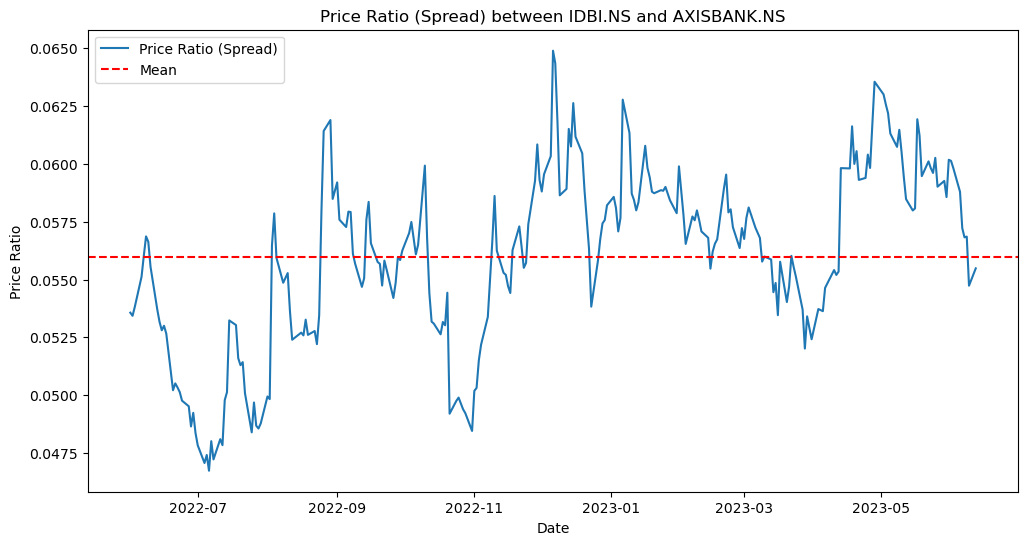

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(price_ratio, label='Price Ratio (Spread)')
plt.axhline(price_ratio.mean(), color='r', linestyle='dashed', label='Mean')
plt.legend()
plt.title(f"Price Ratio (Spread) between {stock1_ticker} and {stock2_ticker}")
plt.xlabel("Date")
plt.ylabel("Price Ratio")
plt.show()

In [9]:
upper_entry_threshold = price_ratio.mean() + 2 * price_ratio.std()
lower_entry_threshold = price_ratio.mean() - 2 * price_ratio.std()
exit_threshold = price_ratio.mean()


In [10]:
stock_A_position = 0
stock_B_position = 0

for i in range(1, len(price_ratio)):
    # Entry Rules
    if price_ratio[i] > upper_entry_threshold and price_ratio[i - 1] <= upper_entry_threshold:
        # Go short on Stock A
        stock_A_position = -100  # Short 100 shares of Stock A
        # Go long on Stock B with an equal amount of capital
        stock_B_position = 100 * price_ratio[i]  # Long 100 shares of Stock B based on the current price ratio
        print(f"Entry: Short {stock1_ticker} and Long {stock2_ticker} at price ratio: {price_ratio[i]}")
    elif price_ratio[i] < lower_entry_threshold and price_ratio[i - 1] >= lower_entry_threshold:
        # Go long on Stock A
        stock_A_position = 100  # Long 100 shares of Stock A
        # Go short on Stock B with an equal amount of capital
        stock_B_position = -100 * price_ratio[i]  # Short 100 shares of Stock B based on the current price ratio
        print(f"Entry: Long {stock1_ticker} and Short {stock2_ticker} at price ratio: {price_ratio[i]}")

    # Exit Rule
    if price_ratio[i] > exit_threshold and price_ratio[i - 1] <= exit_threshold:
        # Close positions
        stock_A_position = 0
        stock_B_position = 0
        print(f"Exit: Close positions at price ratio: {price_ratio[i]}")
    elif price_ratio[i] < exit_threshold and price_ratio[i - 1] >= exit_threshold:
        # Close positions
        stock_A_position = 0
        stock_B_position = 0
        print(f"Exit: Close positions at price ratio: {price_ratio[i]}")

Exit: Close positions at price ratio: 0.05601862372111245
Exit: Close positions at price ratio: 0.05554714709380005
Entry: Long IDBI.NS and Short AXISBANK.NS at price ratio: 0.04782979835887989
Exit: Close positions at price ratio: 0.05646817248459959
Exit: Close positions at price ratio: 0.05593685655456417
Exit: Close positions at price ratio: 0.05791350057303339
Exit: Close positions at price ratio: 0.055679431894375464
Exit: Close positions at price ratio: 0.05759292784140299
Exit: Close positions at price ratio: 0.05575742558735155
Exit: Close positions at price ratio: 0.05626022819589421
Exit: Close positions at price ratio: 0.05440830881147035
Exit: Close positions at price ratio: 0.05665560181801911
Exit: Close positions at price ratio: 0.05528789569572332
Exit: Close positions at price ratio: 0.056273274891982625
Exit: Close positions at price ratio: 0.05550474283698687
Exit: Close positions at price ratio: 0.05739228472310837
Entry: Short IDBI.NS and Long AXISBANK.NS at price

In [11]:
entry_thresholds = [0.5, 1.0, 1.5]  # Adjust entry thresholds (Example values, you can use your own list)
exit_thresholds = [0.25, 0.5, 0.75]  # Adjust exit thresholds (Example values, you can use your own list)

# Lookback periods (number of days used to calculate the spread)
lookback_periods = [20, 50, 100]  # Example values, you can use your own list

# Trading costs (commission or transaction fees in percentage)
trading_costs = 0.01  # Example value, adjust as needed

# Store results for different parameter combinations
results = {}

# Loop through the parameter combinations and evaluate the strategy
for entry_threshold in entry_thresholds:
    for exit_threshold in exit_thresholds:
        for lookback_period in lookback_periods:
            # Calculate the spread using the price ratio method with the specified lookback period
            price_ratio = stock1_close.rolling(window=lookback_period).mean() / stock2_close.rolling(window=lookback_period).mean()

            # Implement the pair trading strategy with the given parameters
            trades = pair_trading_strategy(price_ratio, entry_threshold, -entry_threshold, exit_threshold)

            # Calculate PnL (profit and loss)
            pnl = 0
            for trade in trades:
                if trade[1] == "Short" or trade[1] == "Long":
                    # Calculate PnL for open positions based on the difference between entry price and current price
                    position_value = 100 * trade[3]
                    pnl -= position_value
                elif trade[1] == "Exit":
                    # Calculate PnL for closed positions based on the difference between exit price and entry price
                    entry_trade = next(trades[i] for i in range(trades.index(trade)) if trades[i][1] in ["Short", "Long"])
                    exit_trade = trade
                    position_value = 100 * (exit_trade[3] - entry_trade[3])
                    pnl += position_value

            # Adjust PnL for trading costs
            total_trading_costs = trading_costs * len(trades) * 100 * stock1_close[0]
            pnl -= total_trading_costs

            # Store the results for this parameter combination
            results[(entry_threshold, exit_threshold, lookback_period)] = pnl

# Print the results
for params, pnl in results.items():
    entry_threshold, exit_threshold, lookback_period = params
    print(f"Entry Threshold: {entry_threshold}, Exit Threshold: {exit_threshold}, Lookback Period: {lookback_period}, PnL: {pnl}")

NameError: name 'pair_trading_strategy' is not defined